In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data1 = np.array([85, 81, 88, 92, 76, 78, 93, 81, 79, 84, 86, 82, 90])
data2 = np.array([69, 82, 92, 76, 78, 83, 87, 67, 73, 69, 83])
print(f'data: {data1}')
print(f'data: {data2}')

data: [85 81 88 92 76 78 93 81 79 84 86 82 90]
data: [69 82 92 76 78 83 87 67 73 69 83]


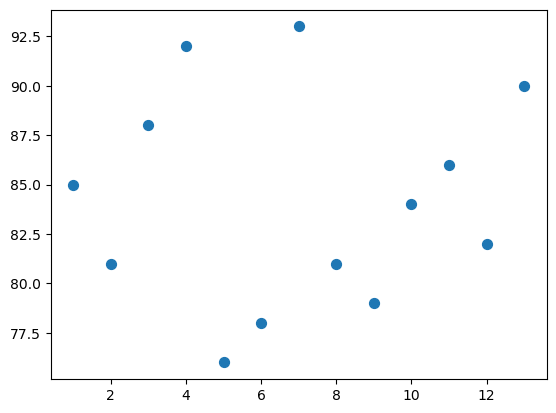

In [3]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
plt.scatter(data, data1, s=50)

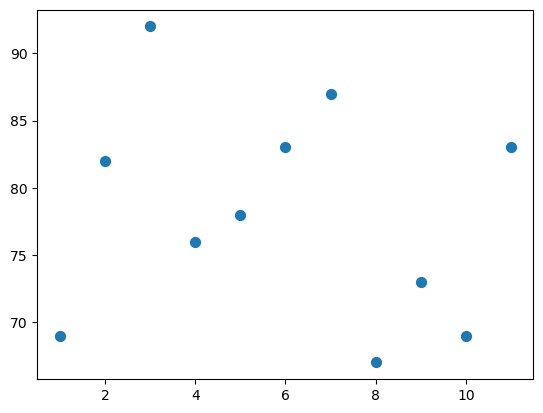

In [4]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
plt.scatter(data, data2, s=50)

Text(0, 0.5, 'Frequency / Частота')

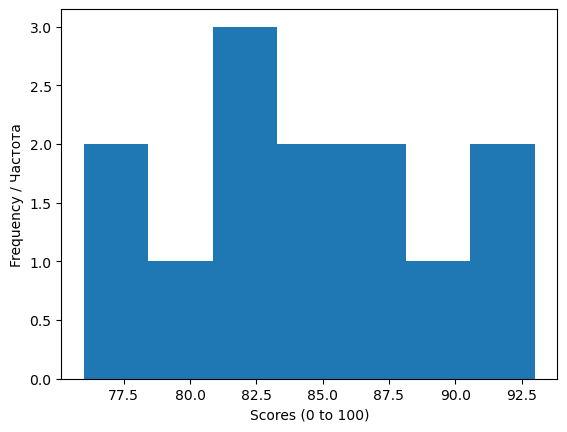

In [5]:
plt.hist(data1, bins=7)
plt.xlabel('Scores (0 to 100)')
plt.ylabel('Frequency / Частота')

Text(0, 0.5, 'Frequency / Частота')

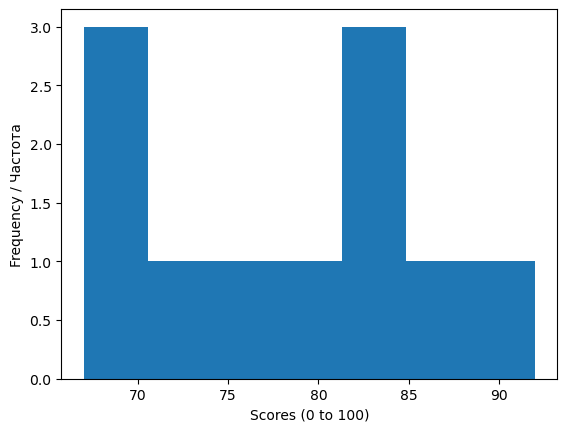

In [6]:
plt.hist(data2, bins=7)
plt.xlabel('Scores (0 to 100)')
plt.ylabel('Frequency / Частота')

In [7]:
productA = np.array([85, 81, 88, 92, 76, 78, 93, 81, 79, 84, 86, 82, 90])
productB = np.array([69, 82, 92, 76, 78, 83, 87, 67, 73, 69, 83])
print(f'prodcut A: {productA}')
print(f'prodcut B: {productB}')

prodcut A: [85 81 88 92 76 78 93 81 79 84 86 82 90]
prodcut B: [69 82 92 76 78 83 87 67 73 69 83]


In [8]:
productA_mean = np.mean(productA)
productA_std = np.std(productA, ddof=1)
productA_var = np.var(productA, ddof=1)
print(f'productA_mean: {productA_mean}')
print(f'productA_std: {productA_std}')
print(f'productA_var: {productA_var}')

productA_mean: 84.23076923076923
productA_std: 5.387544990590894
productA_var: 29.025641025641036


In [9]:
productB_mean = np.mean(productB)
productB_std = np.std(productB, ddof=1)
productB_var = np.var(productB, ddof=1)
print(f'productB_mean: {productB_mean}')
print(f'productB_std: {productB_std}')
print(f'productB_var: {productB_var}')

productB_mean: 78.0909090909091
productB_std: 8.092645370390889
productB_var: 65.49090909090908


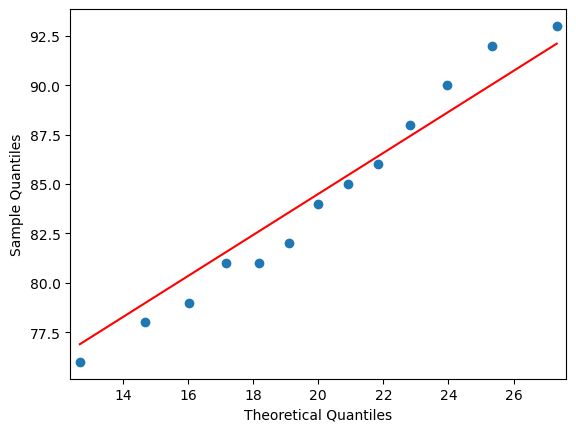

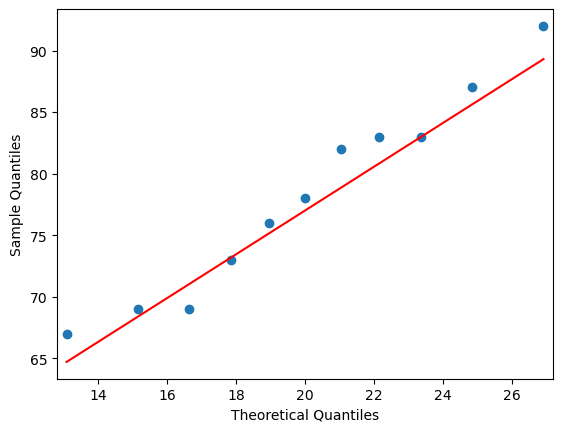

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig1 = sm.qqplot(productA, loc = 20, scale = 5 ,  line='q')
fig2 = sm.qqplot(productB, loc = 20, scale = 5 ,  line='q')

In [11]:
stat, p = stats.shapiro(productA) # тест Шапиро - Уилка
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.8140072822570801
Принять гипотезу о нормальности


In [12]:
stat, p = stats.shapiro(productB) # тест Шапиро - Уилка
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.6831338405609131
Принять гипотезу о нормальности


In [13]:
# Считаем фактическое значение критерия
F=productA_var/productB_var
F

0.4432010706302768

In [14]:
# Найдем p - значение для данной статистики и проверим, превышает ли оно выбранный уровень значимости альфа
p_value = stats.f.cdf(F, dfn=12, dfd=10)
p_value

0.09165343853751313

In [15]:
# Рассчитаем T - критерий для средних значений двух независимых выборок
stats.ttest_ind(productB, productA, equal_var=True)

Ttest_indResult(statistic=-2.219396118751655, pvalue=0.037080300859879754)

In [16]:
# Критерий суммы рангов Вилкоксона
stats.ranksums(productB, productA)

RanksumsResult(statistic=-1.8250011974323115, pvalue=0.06800084864115188)

# Вывод:
## 1 С помощью критерия Шапиро - Уилка проверили выборки на нормальное распределение. По построенным графикам понятно, что можно предположить о выборке взятой из нормального распределения.
## 2 Доказательством того, что вариабельность результатов различается в двух кварталах проверяется с помощью критерия F - Фишера. Сравнили дисперсии обоих выборок и выяснили, что p - значение больше 0,05 - приняли нулевую гипотезу о нормальности в обоих случаях. Это говорит о том, что есть доказательства равности дисперсий.
## 3 Из нулевой гипотезы понятно, что средние значения генеральных совокупностей для выборок А и B равны. Из альтернативной гипотезы понятно, что средние значения генеральных совокупностей для выборок А и B не равны. Поскольку эмпирическое значение критерия Стьюдента больше, чем табличное (теоретическое), наблюдаемая разница не случайна. Так как p - value меньше 0,05 - принимаем альтернативную гипотезу.
## 4 Так как выборки имеют разный размер, то воспользуемся критерием суммы рангов Вилкоксона. Значение p - value больше 0,05, а это значит что два набора взяты из одного и того же распределения (тест не может отвергнуть нулевую гипотезу).

In [17]:
data3 = np.array([43.0, 43.3, 42.6, 43.5, 42.7, 42.5, 41.2, 42.0, 43.6, 42.6, 42.5, 43.7, 42.9, 42.8, 42.3,
                  42.2, 42.0, 42.0, 43.6, 42.6, 42.5, 43.7, 42.9, 42.8, 42.3, 43.1, 43.0, 43.3, 42.6, 43.5])
data4 = np.array([43.5, 41.1, 42.3, 42.2, 42.5, 43.4, 43.4, 41.9, 41.5, 42.1, 41.7, 43.5, 42.8, 43.3, 43.8, 42.7,
                  43.3, 44.3, 41.1, 43.5, 41.1, 42.3, 42.2, 42.5, 43.4, 43.4, 41.9, 41.5, 42.1, 41.7, 43.5, 42.8])
print(f'data: {data3}')
print(f'data: {data4}')

data: [43.  43.3 42.6 43.5 42.7 42.5 41.2 42.  43.6 42.6 42.5 43.7 42.9 42.8
 42.3 42.2 42.  42.  43.6 42.6 42.5 43.7 42.9 42.8 42.3 43.1 43.  43.3
 42.6 43.5]
data: [43.5 41.1 42.3 42.2 42.5 43.4 43.4 41.9 41.5 42.1 41.7 43.5 42.8 43.3
 43.8 42.7 43.3 44.3 41.1 43.5 41.1 42.3 42.2 42.5 43.4 43.4 41.9 41.5
 42.1 41.7 43.5 42.8]


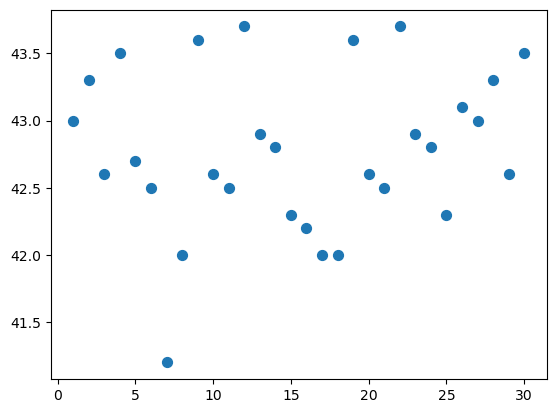

In [18]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
plt.scatter(data, data3, s=50)

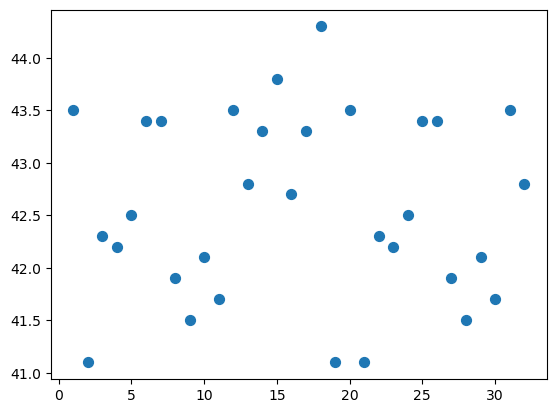

In [19]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
plt.scatter(data, data4, s=50)

In [20]:
# Считаем среднее значение
print(f'mean: {np.mean(data3)}')
# Находим выборочное среднеквадратичное отклонение
print(f'STD: {np.std(data3, ddof=1)}')

mean: 42.77666666666666
STD: 0.5969366242184619


In [21]:
# Считаем среднее значение
print(f'mean: {np.mean(data4)}')
# Находим выборочное среднеквадратичное отклонение
print(f'STD: {np.std(data4, ddof=1)}')

mean: 42.571875
STD: 0.8792351423162458


Text(0, 0.5, 'Frequency / Частота')

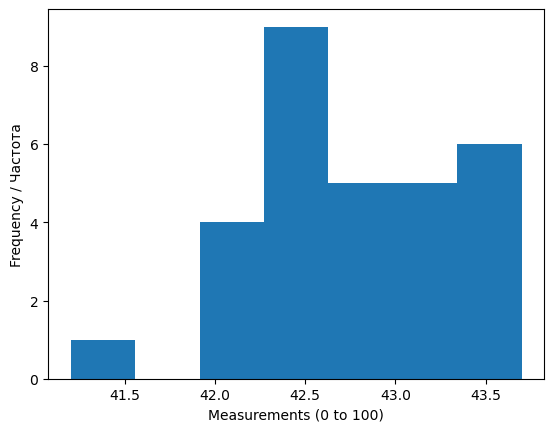

In [22]:
plt.hist(data3, bins=7)
plt.xlabel('Measurements (0 to 100)')
plt.ylabel('Frequency / Частота')

Text(0, 0.5, 'Frequency / Частота')

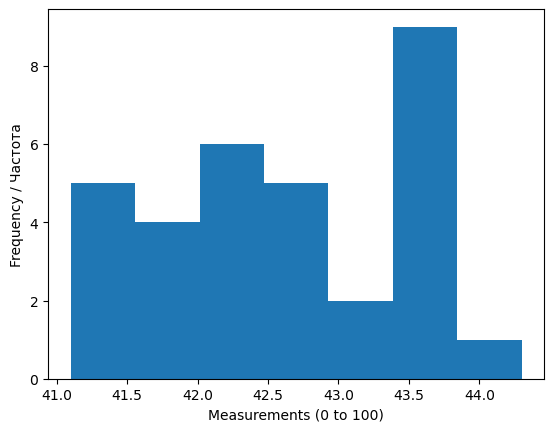

In [23]:
plt.hist(data4, bins=7)
plt.xlabel('Measurements (0 to 100)')
plt.ylabel('Frequency / Частота')

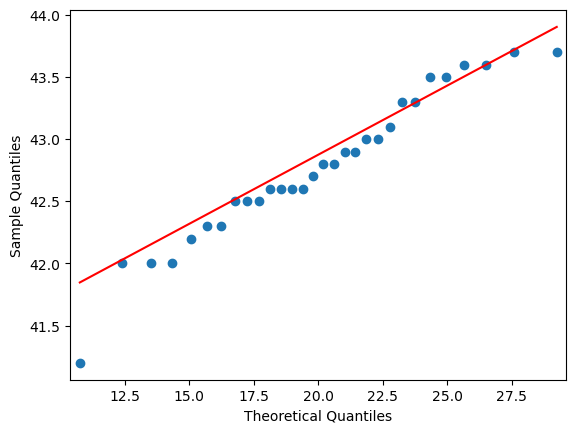

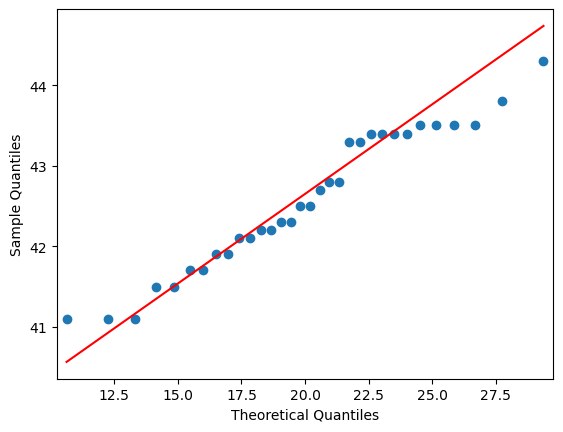

In [24]:
fig3 = sm.qqplot(data3, loc = 20, scale = 5 ,  line='q')
fig4 = sm.qqplot(data4, loc = 20, scale = 5 ,  line='q')

In [25]:
stat, p = stats.shapiro(data3) # тест Шапиро - Уилка
alpha = 0.95
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.3205791413784027
Отклонить гипотезу о нормальности


In [26]:
stat, p = stats.shapiro(data4) # тест Шапиро - Уилка
alpha = 0.95
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

0.11815398931503296
Отклонить гипотезу о нормальности


In [27]:
# Найдем p - значение для данной статистики и проверим, превышает ли оно выбранный уровень значимости альфа
p_value = stats.f.cdf(F, dfn=29, dfd=31)
p_value

0.015149293394066338

In [28]:
# Рассчитаем T - критерий для средних значений двух независимых выборок
stats.ttest_ind(data3, data4, equal_var=True)

Ttest_indResult(statistic=1.0658376004024972, pvalue=0.29076731411114237)

In [29]:
# Критерий суммы рангов Вилкоксона
stats.ranksums(data3, data4)

RanksumsResult(statistic=1.1198293875152845, pvalue=0.262786473545053)

# Вывод:

## 1 С помощью критерия Шапиро - Уилка проверили выборки на нормальное распределение. По построенным графикам и рассчитанному критерию Шапиро - Уилка понятно, что можно предположить то, что выборки не имеют нормального распределения. Отклоняем нулевую гипотезу и принимаем альтернативную.
## 2 Доказательством того, что вариабельность результатов различается в двух кварталах проверяется с помощью критерия F - Фишера. Сравнили дисперсии обоих выборок и выяснили, что p - значение больше 0,05 - приняли нулевую гипотезу в обоих случаях. Это говорит о том, что есть доказательства равности дисперсий.
## 3 Из нулевой гипотезы понятно, что средние значения генеральных совокупностей для выборок А и B равны. Из альтернативной гипотезы понятно, что средние значения генеральных совокупностей для выборок А и B не равны. Поскольку эмпирическое значение критерия Стьюдента больше, чем табличное (теоретическое), наблюдаемая разница не случайна. Так как p - value больше 0,05 - принимаем нулевую гипотезу.
## 4 Так как выборки имеют разный размер, то воспользуемся критерием суммы рангов Вилкоксона. Значение p - value больше 0,05, а это значит что два набора взяты из одного и того же распределения (тест не может отвергнуть нулевую гипотезу).